### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

# Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [16]:
data = pd.read_csv('data/coupons.csv')

### Data Exploration

In [17]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [19]:
print(data.dtypes)


destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [20]:
print(data.describe())


        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [21]:
# Types of coupons
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

### Data Cleaning


3. Decide what to do about your missing data -- drop, replace, other...

#### Clean Age and rename column
* Age is an obvious one because it is currently and object and not a numeric value.  
* Also passenger is spelled wrong.  Rename passanger to passenger.

In [22]:
#data['age'].min()
data['age'].max()


'below21'

age.min = 21  
age.max = 'below21'  
**Note:** so we can set that to 20, so that we can convert and plot it correctly so str.replace 'below',''. The only real significance is when it comes to the Bar coupon. Which would be surprising if there were any that go to the bar if the age is "below21"

There is also '50plus' > str.replace 'plus',''

In [23]:
data['age'].value_counts()
data['age'] = pd.to_numeric(data['age'].astype('str').str.replace('below21','20').str.replace('50plus','50'))



In [ ]:
# Fix column name typo
data = data.rename(columns={'passanger': 'passenger'})

In [25]:
# Double check dtypes
data.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                      int64
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

#### Drop Values
* The car column.  Hypothesis - why would the type of car matter on whether a coupon is accepted or not? 

In [29]:
#data['car'].value_counts()
#data['car'].isna()
percentage_of_na_car_values = (data['car'].notna().sum() / len(data['car'])) * 100
percentage_of_na_car_values


np.float64(0.8514664143803218)

.85% of values provided for the car, the rest was NaN.  That's less than 1%.  So let's drop the car column.  Hypothesis is correct, the type of car does not matter on whether a coupon is accepted or not.

In [12]:
data = data.drop(columns='car')
data.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                      int64
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

We should double check for any high number of NaN.

In [13]:
data.isnull().sum()

destination               0
passenger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

Does education level have an impact on whether a coupon is used? Hypothesis is no. I would think that the higher education
Less likely to use coupons because you would still be spending money vs saving it. However, the opposite is true. Higher education levels
correlate with higher coupon usage.

In [ ]:
# Did use the coupon
data.query("Y == 1")['education'].value_counts()

education
Some college - no degree                  2595
Bachelors degree                          2403
Graduate degree (Masters or Doctorate)     975
Associates degree                          638
High School Graduate                       536
Some High School                            63
Name: count, dtype: int64

In [ ]:
# Did not use the coupon
data.query("Y == 0")['education'].value_counts()

education
Bachelors degree                          1932
Some college - no degree                  1756
Graduate degree (Masters or Doctorate)     877
Associates degree                          515
High School Graduate                       369
Some High School                            25
Name: count, dtype: int64

In [43]:
#Ok so what does this look like in a visualization? 
#Also, how many people age 20, used a coupon?

len(data.query('age == 20 & Y == 1'))

347

In [44]:
data.query('age == 20 & Y == 1')['coupon'].value_counts()

coupon
Coffee House             108
Restaurant(<20)           94
Carry out & Take away     83
Bar                       36
Restaurant(20-50)         26
Name: count, dtype: int64

Despite the age limitations, there were 36 peopls "below 21" who used a coupon at a Bar.  

#### Proportion of total observations

4. What proportion of the total observations chose to accept the coupon?  
**56.84%**


In [146]:
accept_proption = ((data['Y'] == 1).sum() / data['Y'].count()) * 100 
accept_proption

np.float64(56.84326710816777)

In [31]:
data.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                      int64
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

### Visualizations

5. Use a bar plot to visualize the `coupon` column.

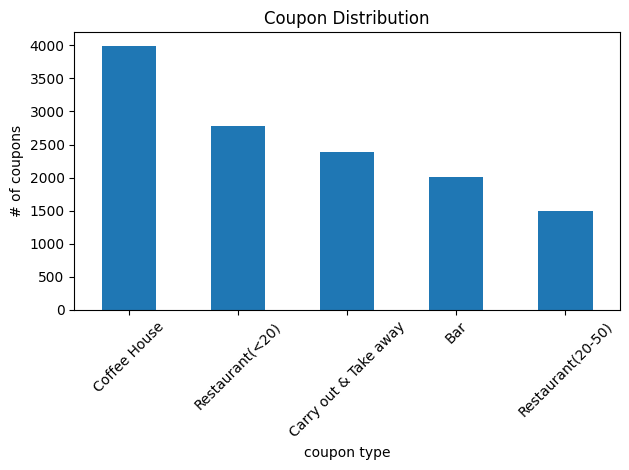

In [49]:
data['coupon'].value_counts().plot(kind='bar', title='Coupon Distribution')
plt.xticks(rotation=45)
plt.ylabel('# of coupons')
plt.xlabel('coupon type')
plt.tight_layout()
plt.savefig("images/coupon_distribution.png")
plt.show()

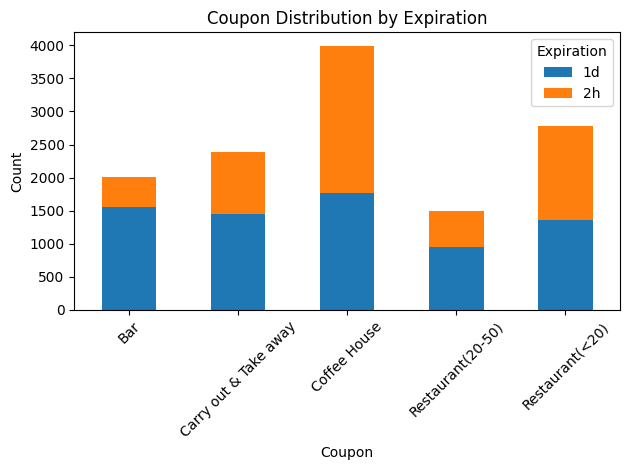

In [209]:
data.groupby(['coupon', 'expiration']).size().unstack().plot(kind='bar', stacked=True, title='Coupon Distribution by Expiration')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.legend(title='Expiration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

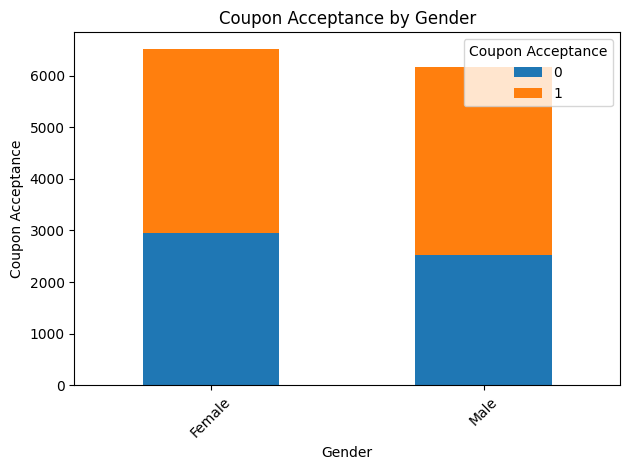

In [210]:
data.groupby(['gender', 'Y']).size().unstack().plot(kind='bar', stacked=True, title='Coupon Acceptance by Gender')
plt.xlabel('Gender')
plt.ylabel('Coupon Acceptance')
plt.legend(title='Coupon Acceptance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [214]:
print(data.groupby('gender')['Y'].value_counts())

gender  Y
Female  1    3563
        0    2948
Male    1    3647
        0    2526
Name: count, dtype: int64


In [241]:
men_accepted_coupons = len(data[(data['Y'] == 1) & (data['gender'] == 'Male')]) 
total_coupons_accepted = len(data.query("Y == 1"))
percentage_of_male_accepted = (men_accepted_coupons / total_coupons_accepted) * 100
percentage_of_male_accepted

50.58252427184466

So it's almost an even split percentage wise between genders but is there a specific age group within each gender that accepted coupons?

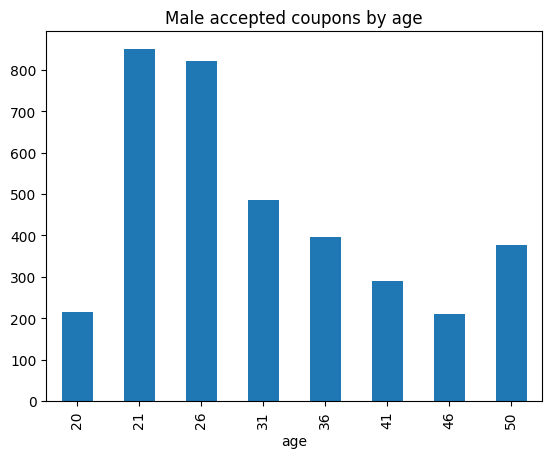

In [257]:
men_accepted_coupons_by_age = data[(data['Y'] == 1) & (data['gender'] == 'Male')]['age'].value_counts()
men_accepted_coupons_by_age.sort_index().plot(kind='bar', title='Male accepted coupons by age')
plt.show()

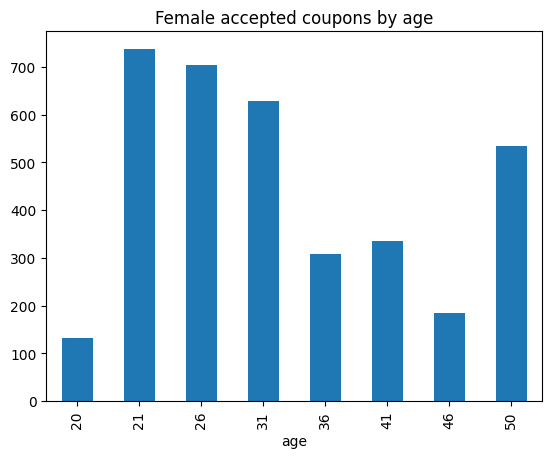

In [256]:
female_accepted_coupons_by_age = data[(data['Y'] == 1) & (data['gender'] == 'Female')]['age'].value_counts()
female_accepted_coupons_by_age.sort_index().plot(kind='bar', title='Female accepted coupons by age')
plt.show()

In [ ]:
print(data.groupby('destination')['Y'].value_counts())

destination      Y
Home             1    1639
                 0    1598
No Urgent Place  1    3982
                 0    2301
Work             1    1589
                 0    1575
Name: count, dtype: int64


Based on the data, gender and age did not have significant factor on coupon acceptance.

In [259]:
no_urgent_destination = len(data[(data['Y'] == 1) & (data['destination'] == 'No Urgent Place')])
no_urgent_desination_percentage = (no_urgent_destination / total_coupons_accepted) * 100
no_urgent_desination_percentage

55.22884882108183

6. Use a histogram to visualize the temperature column.

<Axes: title={'center': 'Temperature Distribution'}, ylabel='Frequency'>

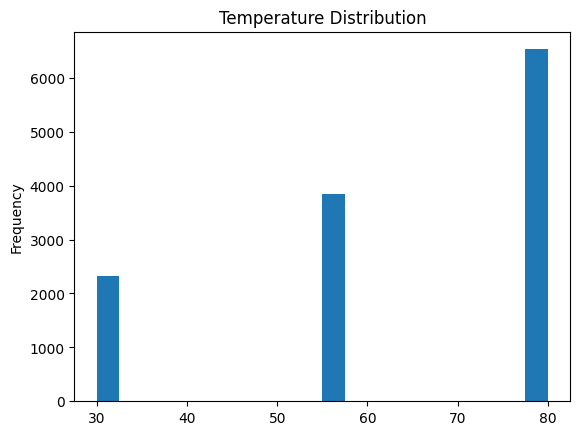

In [ ]:
data['temperature'].plot(kind='hist', bins=20, title='Temperature Distribution')

In [169]:
data.query("Y == 1")[['gender','age']].groupby('gender').value_counts()


gender  age
Female  21     737
        26     703
        31     628
        50     534
        41     335
        36     309
        46     185
        20     132
Male    21     850
        26     822
        31     486
        36     397
        50     376
        41     291
        20     215
        46     210
Name: count, dtype: int64

In [266]:
data[data['Y'] == 1]['passenger'].value_counts()

passenger
Alone        3841
Friend(s)    2221
Partner       640
Kid(s)        508
Name: count, dtype: int64

More likely to accept the coupon when traveling Alone or with Friend(s) vs w/ a partner or kid(s).  

In [267]:
data[data['Y'] == 1]['time'].value_counts()

time
6PM     1888
7AM     1589
10AM    1384
2PM     1329
10PM    1020
Name: count, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [150]:
bar_only = data.query("coupon == 'Bar'")
bar_only

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [151]:
bar_only_accept_proption = (bar_only['Y'] == 1).sum() / bar_only['Y'].count()
bar_only_accept_proption

np.float64(0.41001487357461575)

**41%** of bar related coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  